In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
## Wheat Data set!

In [2]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/updated_crop_prices/new_wheat.csv')

In [3]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,10-05-2014
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,20-03-2014
...,...,...,...,...,...,...,...,...,...
1014947,Birbhum,Sainthia,Wheat,Sonalika,FAQ,1930.0,1950.0,1940.0,05-07-2020
1014948,Birbhum,Sainthia,Wheat,Sonalika,FAQ,1930.0,1950.0,1940.0,04-07-2020
1014949,Birbhum,Sainthia,Wheat,Sonalika,FAQ,1930.0,1950.0,1940.0,03-07-2020
1014950,Birbhum,Sainthia,Wheat,Sonalika,FAQ,1930.0,1950.0,1940.0,02-07-2020


# Pre-processing

In [4]:
df.shape

(1014952, 9)

In [5]:
rows = df.shape[0]
rows

1014952

In [6]:
cols = df.shape[1]
cols

9

In [7]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
dtype: bool

## Dealing with Null Values!

In [8]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [9]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!


In [10]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 398 unique values!
The column Market Name has 1747 unique values!
The column Commodity has 1 unique values!
The column Variety has 61 unique values!
The column Grade has 4 unique values!
The column Min Price (Rs./Quintal) has 3031 unique values!
The column Max Price (Rs./Quintal) has 4146 unique values!
The column Modal Price (Rs./Quintal) has 3635 unique values!
The column Price Date has 5812 unique values!


In [11]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [12]:
import pandas as pd

# Assuming df is your DataFrame
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternatively, you can use the following code to replace spaces with underscores and convert to lowercase
# df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now, the column names will be in lowercase and with underscores instead of spaces
print(df.columns)


Index(['district_name', 'market_name', 'commodity', 'variety', 'grade',
       'min_price_(rs./quintal)', 'max_price_(rs./quintal)',
       'modal_price_(rs./quintal)', 'price_date'],
      dtype='object')


In [13]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,10-05-2014
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,20-03-2014


### dealing with modal_price if its having value as 0

In [14]:
df['modal_price_(rs./quintal)'].dtype

dtype('float64')

In [15]:


zero_count = df['modal_price_(rs./quintal)'].value_counts().get(0, 0)
print(f"Number of rows with modal_price_(rs./quintal) as 0: {zero_count}")


Number of rows with modal_price_(rs./quintal) as 0: 3564


In [16]:
import numpy as np

# Define a function to calculate the average price for each row
def calculate_average(row):
    if row['modal_price_(rs./quintal)'] == 0:
        return (row['min_price_(rs./quintal)'] + row['max_price_(rs./quintal)']) / 2
    else:
        return row['modal_price_(rs./quintal)']

# Apply the function to calculate the average price for each row
df['modal_price_(rs./quintal)'] = df.apply(calculate_average, axis=1)


In [17]:
zero_count = df['modal_price_(rs./quintal)'].value_counts().get(0, 0)
print(f"Number of rows with modal_price_(rs./quintal) as 0: {zero_count}")

Number of rows with modal_price_(rs./quintal) as 0: 0


In [18]:
df['month'] = df['price_date'].str[3:5].astype(int)
df['year'] = df['price_date'].str[6:].astype(int)


In [19]:
df.head(3)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009,6,2009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014,5,2014
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014,5,2014


In [20]:
df['price_date'].dtype


dtype('O')

In [21]:
# Convert 'price_date' to timestamp
df['price_date'] = pd.to_datetime(df['price_date'], format='%d-%m-%Y')

# Convert 'month' and 'year' to int
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Display the updated DataFrame
print(df.dtypes)

district_name                        object
market_name                          object
commodity                            object
variety                              object
grade                                object
min_price_(rs./quintal)             float64
max_price_(rs./quintal)             float64
modal_price_(rs./quintal)           float64
price_date                   datetime64[ns]
month                                 int64
year                                  int64
dtype: object


In [22]:
df_copy = df

# Encoding Columns

## district Name

In [23]:
df['district_name'].nunique()

398

In [24]:
value_counts = df['district_name'].value_counts()

In [25]:
value_counts

Ahmednagar             35978
Nashik                 26983
Buldhana               25276
Aurangabad             22905
Jalgaon                18537
                       ...  
Keonjhar                   1
Kozhikode(Calicut)         1
Karimganj                  1
Gajapati                   1
Khurda                     1
Name: district_name, Length: 398, dtype: int64

In [26]:
district_name_frequency = df['district_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['district_name_encoded'] = df['district_name'].map(district_name_frequency)

In [27]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,6,2009,2324
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,5,2014,93
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,5,2014,93
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,5,2014,93
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,3,2014,93


## market name

In [28]:
df['market_name'].nunique()

1747

In [29]:
value_counts = df['market_name'].value_counts()

In [30]:
value_counts

Nagpur              6183
Basava Kalayana     5380
Najafgarh           5309
Jalana              5134
Bangalore           4985
                    ... 
Panvel                 1
Pandara                1
Nasik                  1
Mahur                  1
Anakapally             1
Name: market_name, Length: 1747, dtype: int64

In [31]:
market_name_frequency = df['market_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['market_name_encoded'] = df['market_name'].map(market_name_frequency)

In [32]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,6,2009,2324,1
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,5,2014,93,91
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,5,2014,93,91
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,5,2014,93,91
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,3,2014,93,91


In [33]:
df = df.drop('commodity',axis=1)

## variety

In [34]:
df['variety'].nunique()

61

In [35]:
value_counts = df['variety'].value_counts()

In [36]:
variety_frequency = df['variety'].value_counts(normalize=False)

# Create a new column with encoded values
df['variety_encoded'] = df['variety'].map(variety_frequency)

In [37]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded,variety_encoded
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,6,2009,2324,1,7508
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,5,2014,93,91,520137
2,Cuddapah,Cuddapah,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,5,2014,93,91,520137
3,Cuddapah,Cuddapah,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,5,2014,93,91,520137
4,Cuddapah,Cuddapah,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,3,2014,93,91,520137


## grade

In [38]:
df['grade'].unique()

array(['FAQ ', 'Medium ', 'Large ', 'Small '], dtype=object)

In [39]:
value_counts = df['grade'].value_counts()
value_counts

FAQ        1005039
Medium        9806
Large           65
Small           42
Name: grade, dtype: int64

In [40]:
grade_frequency = df['grade'].value_counts(normalize=False)

# Create a new column with encoded values
df['grade_encoded'] = df['grade'].map(grade_frequency)

In [41]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,6,2009,2324,1,7508,1005039
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,5,2014,93,91,520137,1005039
2,Cuddapah,Cuddapah,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,5,2014,93,91,520137,1005039
3,Cuddapah,Cuddapah,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,5,2014,93,91,520137,1005039
4,Cuddapah,Cuddapah,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,3,2014,93,91,520137,1005039


# Taking only the Encoded columns

In [42]:
df_encoded = df[['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'month', 'year', 'price_date', 'min_price_(rs./quintal)', 'max_price_(rs./quintal)', 'modal_price_(rs./quintal)']]


# Encoded Dataset

In [43]:
df_encoded.head(8)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,2324,1,7508,1005039,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,93,91,520137,1005039,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,93,91,520137,1005039,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,93,91,520137,1005039,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,93,91,520137,1005039,3,2014,2014-03-20,1548.0,1610.0,1579.0
5,93,91,520137,1005039,3,2014,2014-03-19,1545.0,1551.0,1548.0
6,93,91,520137,1005039,3,2014,2014-03-15,1551.0,1642.0,1596.0
7,93,91,520137,1005039,3,2014,2014-03-13,1575.0,1918.0,1746.0


# Heat Map

<ipython-input-45-cdf7dfc3c83f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)


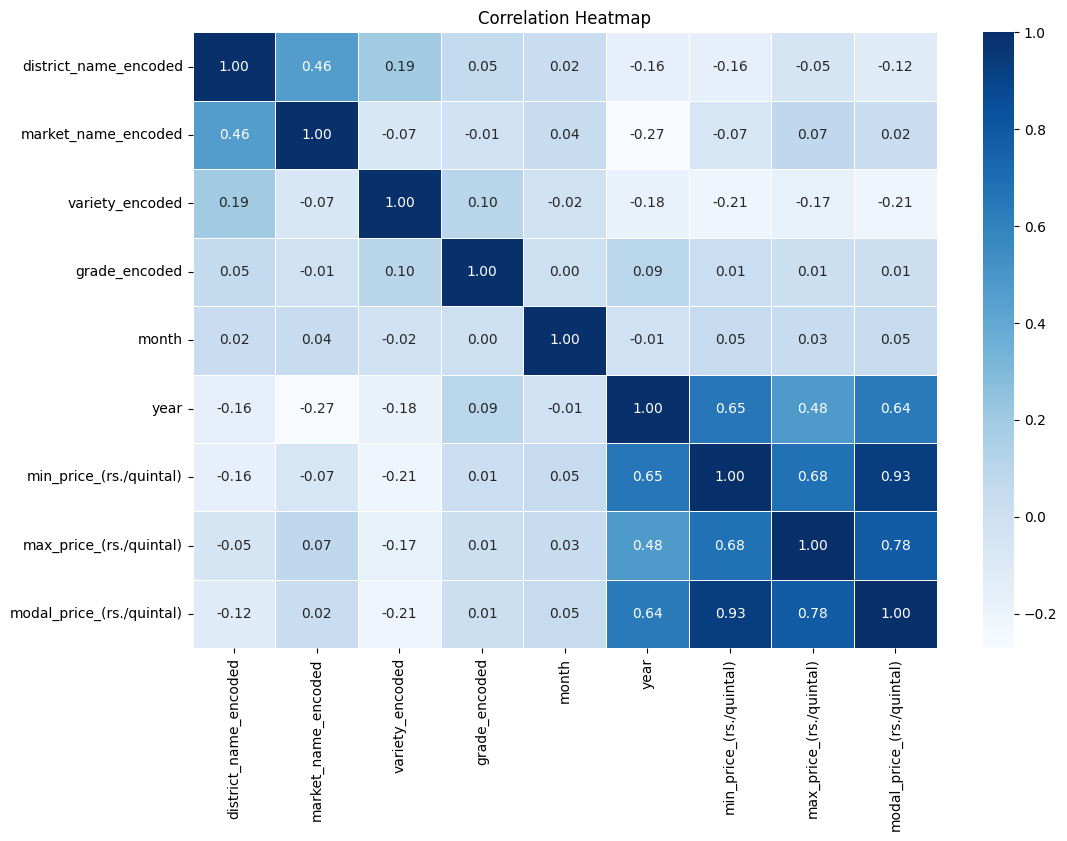

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Models and Evaluation

In [ ]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [ ]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,2324,1,7508,1005039,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,93,91,520137,1005039,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,93,91,520137,1005039,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,93,91,520137,1005039,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,93,91,520137,1005039,3,2014,2014-03-20,1548.0,1610.0,1579.0


In [ ]:
df_encoded['grade_encoded'].unique()

array([1005039,    9806,      65,      42])

# Outlier Removing rows

In [ ]:

import pandas as pd
from scipy.stats import zscore

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
    outliers = (abs(z_scores) > threshold).any(axis=1)
    return outliers

# Identify outliers
outliers = identify_outliers_zscore(df_encoded)

# Remove rows with outliers
df_cleaned = df_encoded[~outliers]

In [ ]:
df_encoded = df_cleaned

In [ ]:
df_encoded['grade_encoded'].nunique()

1

## Standardizing values (min-max scalar)

In [ ]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,2324,1,7508,1005039,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,93,91,520137,1005039,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,93,91,520137,1005039,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,93,91,520137,1005039,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,93,91,520137,1005039,3,2014,2014-03-20,1548.0,1610.0,1579.0
...,...,...,...,...,...,...,...,...,...,...
1014947,3726,922,8233,1005039,7,2020,2020-07-05,1930.0,1950.0,1940.0
1014948,3726,922,8233,1005039,7,2020,2020-07-04,1930.0,1950.0,1940.0
1014949,3726,922,8233,1005039,7,2020,2020-07-03,1930.0,1950.0,1940.0
1014950,3726,922,8233,1005039,7,2020,2020-07-02,1930.0,1950.0,1940.0


In [ ]:
# Columns to be scaled
columns_to_scale = ['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded']

# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


# Standard Scaling
"""
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_encoded[columns_to_scale] = standard_scaler.fit_transform(df_encoded[columns_to_scale])
"""


# Robust Scaling
"""
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df_encoded[columns_to_scale] = robust_scaler.fit_transform(df_encoded[columns_to_scale])
"""

# Power Transformer
"""
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson')
df_encoded[columns_to_scale] = power_transformer.fit_transform(df_encoded[columns_to_scale])
"""

# Quantile Transformer - uniform
"""
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='uniform')
df_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])
"""

# Quantile Transformer - normal
"""
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
df_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])
"""

"\nfrom sklearn.preprocessing import QuantileTransformer\n\nquantile_transformer = QuantileTransformer(output_distribution='normal')\ndf_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])\n"

In [ ]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.086094,0.000000,0.014433,0.0,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,0.003410,0.016732,1.000000,0.0,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,0.003410,0.016732,1.000000,0.0,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,0.003410,0.016732,1.000000,0.0,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,0.003410,0.016732,1.000000,0.0,3,2014,2014-03-20,1548.0,1610.0,1579.0


In [ ]:
df_encoded['grade_encoded'].nunique()

1

## Forward Stepwise Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:

        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf

        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)

                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)

                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score

        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')

    return selected_features


In [ ]:
X = df_encoded.loc[:, ['district_name_encoded',	'market_name_encoded',	'variety_encoded',	'grade_encoded',	'month',	'year']]
y = df_encoded.loc[:, ['min_price_(rs./quintal)',	'max_price_(rs./quintal)',	'modal_price_(rs./quintal)']]

In [ ]:
print(forward_stepwise_selection(X, y))

Selected feature: year, Score: 0.4974
Selected feature: market_name_encoded, Score: 0.5279
Selected feature: district_name_encoded, Score: 0.5375
Selected feature: month, Score: 0.5402
Selected feature: variety_encoded, Score: 0.5414
Selected feature: grade_encoded, Score: 0.5414
['year', 'market_name_encoded', 'district_name_encoded', 'month', 'variety_encoded', 'grade_encoded']


### All the features are closely important

In [ ]:
X.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year
0,0.086094,0.000000,0.014433,0.0,6,2009
1,0.003410,0.016732,1.000000,0.0,5,2014
2,0.003410,0.016732,1.000000,0.0,5,2014
3,0.003410,0.016732,1.000000,0.0,5,2014
4,0.003410,0.016732,1.000000,0.0,3,2014


In [ ]:
y.head(5)

,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,1400.0,1600.0,1500.0
1,1625.0,1680.0,1653.0
2,1500.0,1560.0,1530.0
3,1500.0,1600.0,1550.0
4,1548.0,1610.0,1579.0


## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lnregressor.predict(X_test)
y_pred

array([[2068.97270942, 2258.80978351, 2164.64665093],
       [1261.94928337, 1334.71910939, 1299.49754132],
       [1509.61404292, 1794.61637981, 1657.43520037],
       ...,
       [2003.87383316, 2162.73469379, 2083.53694089],
       [2043.72349728, 2259.80885012, 2152.73060851],
       [1689.71825879, 1834.10119455, 1761.77976683]])

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 225.93880003384916
Root Mean Square error is: 306.5427112111862
R2 score is: 0.5405239143041554


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 61.25294475469075
Root Mean Square error is: 118.6903271984753
R2 score is: 0.9312129809079305


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=250, random_state=42, bootstrap=True, max_depth=70)

# Train the model using the training sets
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test)

In [ ]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 60.71357840700224
Root Mean Square error is: 115.12360918987474
R2 score is: 0.9353371296610412


## XgBoost Regression

In [ ]:
from xgboost import XGBRegressor
# Create the XGBoost regression model
xg_regressor = XGBRegressor(n_estimators=250, learning_rate=0.29,random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xg_regressor.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 85.64430507277142
Root Mean Square error is: 134.8385438397326
R2 score is: 0.9112253314205737


## KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_regressor.predict(X_test)


# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 71.8583605688786
Root Mean Square error is: 136.2738890215316
R2 score is: 0.9096972737306315


# Datasets of Wheat

## Main

In [ ]:
df

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,6,2009,2324,1,7508,1005039
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,5,2014,93,91,520137,1005039
2,Cuddapah,Cuddapah,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,5,2014,93,91,520137,1005039
3,Cuddapah,Cuddapah,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,5,2014,93,91,520137,1005039
4,Cuddapah,Cuddapah,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,3,2014,93,91,520137,1005039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014947,Birbhum,Sainthia,Sonalika,FAQ,1930.0,1950.0,1940.0,2020-07-05,7,2020,3726,922,8233,1005039
1014948,Birbhum,Sainthia,Sonalika,FAQ,1930.0,1950.0,1940.0,2020-07-04,7,2020,3726,922,8233,1005039
1014949,Birbhum,Sainthia,Sonalika,FAQ,1930.0,1950.0,1940.0,2020-07-03,7,2020,3726,922,8233,1005039
1014950,Birbhum,Sainthia,Sonalika,FAQ,1930.0,1950.0,1940.0,2020-07-02,7,2020,3726,922,8233,1005039


### Saving the dataframe of wheat

> Indented block



In [ ]:
df.to_csv('newwdf.csv')

## Encoded

In [ ]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.086094,0.000000,0.014433,0.0,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,0.003410,0.016732,1.000000,0.0,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,0.003410,0.016732,1.000000,0.0,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,0.003410,0.016732,1.000000,0.0,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,0.003410,0.016732,1.000000,0.0,3,2014,2014-03-20,1548.0,1610.0,1579.0
...,...,...,...,...,...,...,...,...,...,...
1014947,0.138055,0.171221,0.015827,0.0,7,2020,2020-07-05,1930.0,1950.0,1940.0
1014948,0.138055,0.171221,0.015827,0.0,7,2020,2020-07-04,1930.0,1950.0,1940.0
1014949,0.138055,0.171221,0.015827,0.0,7,2020,2020-07-03,1930.0,1950.0,1940.0
1014950,0.138055,0.171221,0.015827,0.0,7,2020,2020-07-02,1930.0,1950.0,1940.0


### Saving the encoded dataframe of wheat

In [ ]:
df_encoded.to_csv('newwencdf.csv')

# Saving the Best Model

In [ ]:
"""
import pickle

# Pickle the model
with open('rf_regressor.pkl', 'wb') as f:
    pickle.dump(rf_regressor, f)
"""

"\nimport pickle\n\n# Pickle the model\nwith open('rf_regressor.pkl', 'wb') as f:\n    pickle.dump(rf_regressor, f)\n"